### Identify and quantify the targets of every hubs found

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from upsetplot import UpSet, from_indicators
import seaborn as sns
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
GRN = pd.read_csv('../Data/Network_GRN_HIVE_curated.txt',sep='\t')
GRN.rename(columns={'tf.name':'source','target.name':'target'}, inplace=True)
hubs_tda = pd.read_csv('./Results_hubs_by_TDA_mega_cluster.tsv',sep='\t')

In [3]:
GRN_hubs = GRN[GRN['source'].isin(hubs_tda['OLN'])]

In [9]:
GRN_hubs.to_csv('./Network_GRN_hubs.txt', sep='\t', index=False)

<Figure size 800x600 with 0 Axes>

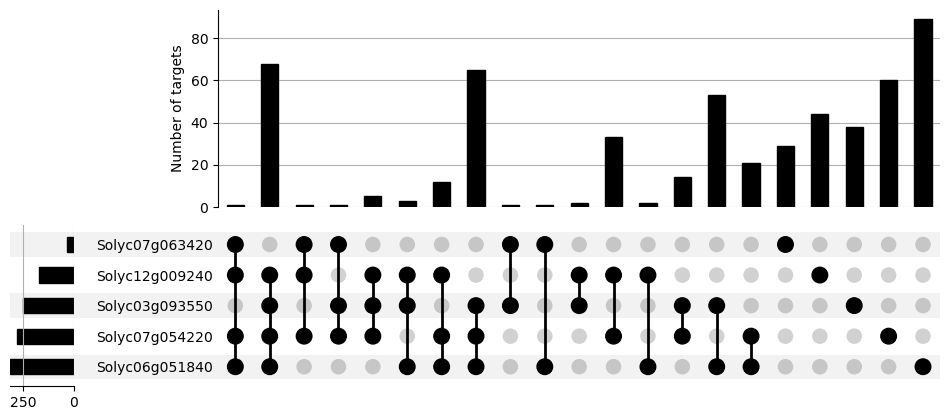

In [10]:

target_to_sources = GRN_hubs.groupby("target")["source"].apply(set)
all_sources = sorted(GRN_hubs["source"].unique())  # Unique sources
membership_df = pd.DataFrame(
    {source: target_to_sources.apply(lambda x: source in x) for source in all_sources}
)

# Step 3: Convert to an UpSet-compatible format
upset_data = from_indicators(all_sources, membership_df)

# Step 4: Create UpSet plot
plt.figure(figsize=(8, 6))
upset = UpSet(upset_data, sort_by="-degree")
plot = upset.plot()
plot["intersections"].set_ylabel("Number of targets")
plt.savefig('./Plot/UpsetPlot_targets_hubs.svg', format='svg')
plt.show()

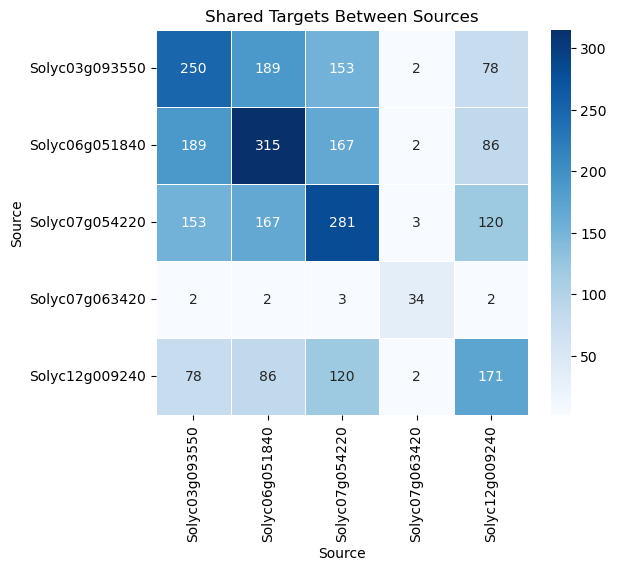

In [6]:

target_to_sources = GRN_hubs.groupby("target")["source"].apply(set)
all_sources = sorted(GRN_hubs["source"].unique())

# Create a binary membership DataFrame
membership_df = pd.DataFrame(
    {source: target_to_sources.apply(lambda x: source in x) for source in all_sources}
).astype(int)

# Step 2: Compute pairwise shared target counts (dot product of binary matrix)
heatmap_data = membership_df.T.dot(membership_df)

# Step 3: Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.title("Shared Targets Between Sources")
plt.xlabel("Source")
plt.ylabel("Source")
plt.show()

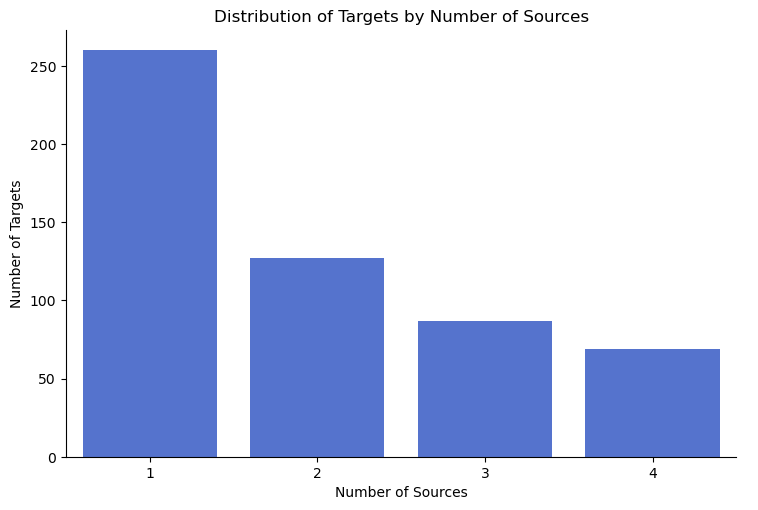

In [7]:

# Step 1: Create binary membership dataframe
target_to_sources = GRN_hubs.groupby("target")["source"].apply(set)
all_sources = sorted(GRN_hubs["source"].unique())

membership_df = pd.DataFrame(
    {source: target_to_sources.apply(lambda x: source in x) for source in all_sources}
).astype(bool)

# Step 2: Count how many sources each target has
source_counts = membership_df.sum(axis=1)  # Sum rows to count sources per target

# Step 3: Count occurrences of each "number of sources"
source_distribution = source_counts.value_counts().reset_index()
source_distribution.columns = ["num_sources", "num_targets"]
source_distribution = source_distribution.sort_values("num_sources")

# Step 4: Plot with `sns.catplot()`
sns.catplot(
    data=source_distribution,
    x="num_sources",
    y="num_targets",
    kind="bar",
    color="royalblue",
    aspect=1.5
)

# Labels
plt.xlabel("Number of Sources")
plt.ylabel("Number of Targets")
plt.title("Distribution of Targets by Number of Sources")

plt.show()

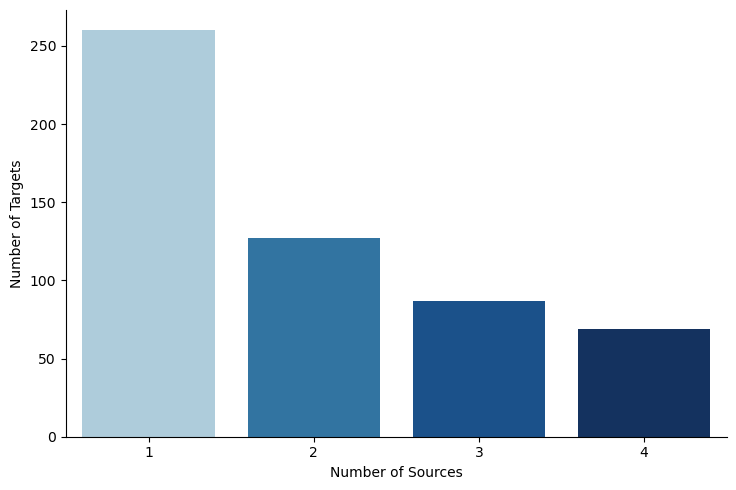

In [8]:
# Step 1: Create binary membership dataframe
target_to_sources = GRN_hubs.groupby("target")["source"].apply(set)
all_sources = sorted(GRN_hubs["source"].unique())

membership_df = pd.DataFrame(
    {source: target_to_sources.apply(lambda x: source in x) for source in all_sources}
).astype(bool)

# Step 2: Count how many sources each target has
source_counts = membership_df.sum(axis=1)  # Sum rows to count sources per target

# Step 3: Count occurrences of each "number of sources"
source_distribution = source_counts.value_counts().reset_index()
source_distribution.columns = ["num_sources", "num_targets"]
source_distribution = source_distribution.sort_values("num_sources")

# Step 4: Define color mapping (for each category of `num_sources`)
color_map = {
    1: "#a6cee3",  # Light Blue
    2: "#1f78b4",  # Medium Blue
    3: "#08519c",  # Dark Blue
    4: "#08306b"   # Very Dark Blue
}

# Step 5: Apply the color mapping to the data
source_distribution["color"] = source_distribution["num_sources"].map(color_map)

# Step 6: Plot with `sns.catplot()`, applying custom colors
g = sns.catplot(
    data=source_distribution,
    x="num_sources",
    y="num_targets",
    kind="bar",
    hue="num_sources",  # To use different colors for each category
    palette=color_map,  # Custom palette based on our color map
    aspect=1.5
)

# Labels
plt.xlabel("Number of Sources")
plt.ylabel("Number of Targets")
g._legend.remove()

plt.savefig('./Plot/Targets_by_sources_hub_network.svg', format='svg')
plt.show()

In [21]:
target_source_count = source_counts.reset_index()
target_source_count.columns = ["target", "num_sources"]

In [ ]:
# target_source_count.to_csv('./Number_sources_per_targets_GRN_hubs.txt',sep='\t',index=False)